# Data Analysis Tools
# Assignment: Generating a Correlation Coefficient

Following is the Python program I wrote to fulfill the third assignment of the [Data Analysis Tools online course](https://www.coursera.org/learn/data-analysis-tools/home/welcome).

I decided to use [Jupyter Notebook](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) as it is a pretty way to write code and present results.

## Research question

Using the [Gapminder database](http://www.gapminder.org/), I would like to see if an increasing Internet usage results in an increasing suicide rate. A study shows that other factors like unemployment could have a great impact.

So for this assignment, the three following variables will be analyzed:

- Internet Usage Rate (per 100 people)
- Suicide Rate (per 100 000 people)
- Unemployment Rate (% of the population of age 15+)


## Data management

For the question I'm interested in, the countries for which data are missing will be discarded. As missing data in Gapminder database are replace directly by `NaN` no special data treatment is needed.

In [2]:
# Magic command to insert the graph directly in the notebook
%matplotlib inline
# Load a useful Python libraries for handling data
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [3]:
# Read the data
data_filename = r'gapminder.csv'
data = pd.read_csv(data_filename, low_memory=False)
data = data.set_index('country')

General information on the Gapminder data

In [4]:
display(Markdown("Number of countries: {}".format(len(data))))
display(Markdown("Number of variables: {}".format(len(data.columns))))

Number of countries: 213

Number of variables: 15

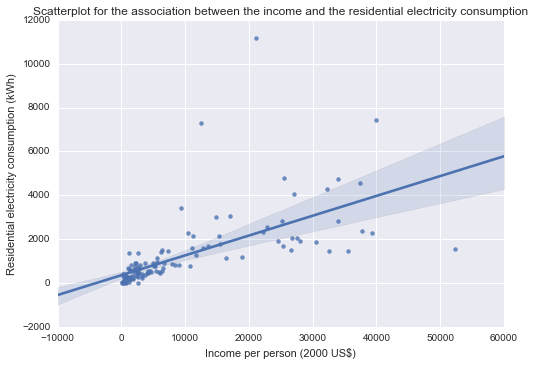

In [5]:
subdata2 = (data[['incomeperperson', 'relectricperperson']]
                .assign(income=lambda x: pd.to_numeric(data['incomeperperson'], errors='coerce'),
                        electricity=lambda x: pd.to_numeric(data['relectricperperson'], errors='coerce'))
                .dropna())

sns.regplot(x='income', y='electricity', data=subdata2)
plt.xlabel('Income per person (2000 US$)')
plt.ylabel('Residential electricity consumption (kWh)')
plt.title('Scatterplot for the association between the income and the residential electricity consumption');

## OLS regression model for the association between income per person and residential electricity consumption

In [8]:
reg1 = smf.ols('electricity ~ income', data=subdata2).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     94.47
Date:                Thu, 07 Jul 2016   Prob (F-statistic):           4.63e-17
Time:                        21:10:47   Log-Likelihood:                -1105.9
No. Observations:                 130   AIC:                             2216.
Df Residuals:                     128   BIC:                             2222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    354.1982    133.738      2.648      0.009        89.574   618.822
income         0.0904      0.009      9.719      0.000         0.072     0.109
==============================================================================
Omnibus:                      148.000   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4079.319
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      29.232   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""